In [40]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv("train_values.csv")
test = pd.read_csv("test_values.csv")
y = pd.read_csv("train_labels.csv")
train.drop('building_id', axis=1, inplace=True)

df = pd.concat([train,y.iloc[:,1]], axis=1)

full = pd.concat([train,test], axis=0)

In [41]:
'''
def grp(by):
    z = df.groupby(by).mean()
    return z['damage_grade']

grp('land_surface_condition')
'''

lsr = []
for item in full['land_surface_condition']:
    if item == 'n':
        lsr.append(2.25)
    elif item == 'o':
        lsr.append(2.29)
    elif item == 't':
        lsr.append(2.234)
full['land_surface_condition_risk'] = lsr

'''
for item in df.select_dtypes('object'):
    print(item)
    df.groupby(item).mean().head(100)

grp('foundation_type')
'''

ftr = []
for item in full['foundation_type']:
    if item=='h':
        ftr.append(2.106)
    elif item=='i':
        ftr.append(1.453)
    elif item=='r':
        ftr.append(2.33)
    elif item=='u':
        ftr.append(1.884)
    elif item=='w':
        ftr.append(1.812)
full['foundation_type_risk'] = ftr

rtr = []
for item in full['roof_type']:
    if item=='n':
        rtr.append(2.27)
    elif item=='q':
        rtr.append(2.32)
    elif item=='x':
        rtr.append(1.572)

full['roof_type_risk'] = rtr

gftr = []
for item in full['ground_floor_type']:
    if item=='f':
        gftr.append(2.31)
    elif item=='m':
        gftr.append(1.97)
    elif item=='v':
        gftr.append(1.63)
    elif item=='x':
        gftr.append(2.25)
    elif item=='z':
        gftr.append(2.07)
full['ground_floor_type_risk'] = gftr

oftr = []
for item in full['other_floor_type']:
    if item=='j':
        oftr.append(2.043)
    elif item=='q':
        oftr.append(2.3157)
    elif item=='s':
        oftr.append(1.607)
    elif item=='x':
        oftr.append(2.297)
full['other_floor_type_risk'] = oftr

ptr = []
for item in full['position']:
    if item=='j':
        ptr.append(2.153)
    elif item=='o':
        ptr.append(2.207)
    elif item=='s':
        ptr.append(2.229)
    elif item=='t':
        ptr.append(2.309)
full['position_risk'] = ptr

pctr = []
for item in full['plan_configuration']:
    if item=='c':
        pctr.append(1.837)
    elif item=='a':
        pctr.append(1.8532)
    elif item=='o':
        pctr.append(1.8931)
    elif item=='m':
        pctr.append(1.913)
    elif item=='u':
        pctr.append(1.9183)
    elif item=='s':
        pctr.append(2.05)
    elif item=='n':
        pctr.append(2.158)
    elif item=='d':
        pctr.append(2.24365)
    elif item=='q':
        pctr.append(2.2714)
    elif item=='f':
        pctr.append(2.2727)

full['plan_configuration_risk'] = pctr

lotr = []
for item in full['legal_ownership_status']:
    if item=='a':
        lotr.append(1.894)
    elif item=='r':
        lotr.append(2.217)
    elif item=='v':
        lotr.append(2.244)
    elif item=='w':
        lotr.append(2.4158)
full['legal_ownership_status_risk'] = lotr

full.drop('building_id',axis=1,inplace=True)

objects = []
for item in full.select_dtypes('object'):
    objects.append(item)
    

full.drop(objects, axis=1, inplace=True)

In [42]:
full['risk_factor'] = (full['land_surface_condition_risk'] + full['foundation_type_risk']+
                      full['roof_type_risk'] + full['ground_floor_type_risk'] + full['position_risk']+
                      full['other_floor_type_risk'] + full['plan_configuration_risk'] + full['legal_ownership_status_risk']) / 8

full['area_per_family'] = full['count_families'] / full['area_percentage']
full['height_per_floor'] = full['height_percentage'] / full['count_floors_pre_eq']
full['families_per_floor'] = full['count_families'] / full['count_floors_pre_eq']

full['has_superstructure'] = (full['has_superstructure_adobe_mud'] | full['has_superstructure_bamboo'] |
                              full['has_superstructure_cement_mortar_brick'] | full['has_superstructure_cement_mortar_stone'] |
                              full['has_superstructure_mud_mortar_brick'] | full['has_superstructure_mud_mortar_stone'] |
                              full['has_superstructure_other'] | full['has_superstructure_stone_flag'] |
                              full['has_superstructure_timber'])

full['has_cement'] = (full['has_superstructure_cement_mortar_brick'] | full['has_superstructure_cement_mortar_stone'])
full['has_mortar'] = (full['has_superstructure_mud_mortar_brick'] | full['has_superstructure_mud_mortar_stone'])


In [43]:
x = full.iloc[:len(train), :]
X = full.iloc[len(train):, :]

In [44]:
'''x.to_csv("train_fe_3.csv", index=False)
X.to_csv("test_fe_3.csv", index=False)
'''

'x.to_csv("train_fe_3.csv", index=False)\nX.to_csv("test_fe_3.csv", index=False)\n'

In [45]:
z = df.groupby(by='geo_level_1_id').mean()

geo_1_risk = {}
for i in range(0, z.shape[0]):
    geo_1_risk[i] = z.iloc[i,-1]


z = df.groupby(by='geo_level_2_id').mean()


geo_2_risk = {}
for i in range(0, z.shape[0]):
    geo_2_risk[i] = z.iloc[i,-1]


z = df.groupby(by='geo_level_3_id').mean()

geo_3_risk = {}
for i in range(0, z.shape[0]):
    geo_3_risk[i] = z.iloc[i,-1]


df['geo_1_risk'] = df['geo_level_1_id'].map(geo_1_risk)
df['geo_2_risk'] = df['geo_level_2_id'].map(geo_2_risk)
df['geo_3_risk'] = df['geo_level_3_id'].map(geo_3_risk)

df['geo_2_risk'].fillna(method='backfill', axis=0, inplace=True)
df['geo_3_risk'].fillna(method='backfill', axis=0, inplace=True)


In [46]:
df.drop(['geo_level_1_id','geo_level_2_id','geo_level_3_id'], axis=1, inplace=True)

# MACHINE LEARNING

In [47]:
def run_model(model, data):
    model.fit(data[0], data[1])
    pred = model.predict(data[2])
    score = f1_score(data[3], pred, average='micro')
    return score

In [48]:
from sklearn.linear_model import LogisticRegression, LassoCV, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


lr = LogisticRegression()
sgdc = SGDClassifier()
ada = AdaBoostClassifier()
bag = BaggingClassifier()
etc = ExtraTreeClassifier()
gbc = GradientBoostingClassifier()
rfc = RandomForestClassifier()
gnb = GaussianNB()
bnb = BernoulliNB()
knn = KNeighborsClassifier()
mlpc = MLPClassifier()
xgb = XGBClassifier()
xgbr = XGBRFClassifier()
lgb = LGBMClassifier()
cat = CatBoostClassifier()


models = [ lr, ada, bag, etc, gbc, rfc, 
           knn, xgb, xgbr, lgb, cat]


x_train,x_test,y_train,y_test = train_test_split(x,y['damage_grade'],test_size=0.13)

data = [x_train, y_train, x_test, y_test]

In [38]:
model_names = []
model_performances = []

for model in models:
    perf = run_model(model, data)
    model_performances.append(perf)
    model_names.append(str(model.get_params).split('(')[0].split()[-1])
    print(model_names[-1], model_performances[-1])
    

LogisticRegression 0.5694382951090646
AdaBoostClassifier 0.6444995424894477
BaggingClassifier 0.7052156202957585
ExtraTreeClassifier 0.6289441837126244
GradientBoostingClassifier 0.6836683491248265
RandomForestClassifier 0.6903686649546917
KNeighborsClassifier 0.7076064818914372
[00:06:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 0.7255822190737625
[00:10:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBRFClassifier 0.6605271702234422
LGBMClassifier 0.7106467133032

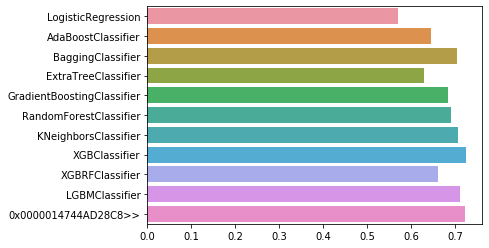

In [49]:
sns.barplot(model_performances, model_names)